In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1.9000     ✔ purrr   0.2.4     
✔ tibble  1.3.4          ✔ dplyr   0.7.4     
✔ tidyr   0.7.2          ✔ stringr 1.2.0     
✔ readr   1.1.1.9000     ✔ forcats 0.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# read the dataset
data <- read_csv("../input/cereal.csv")

# summary of the dataset
summary(data)

Parsed with column specification:
cols(
  name = col_character(),
  mfr = col_character(),
  type = col_character(),
  calories = col_double(),
  protein = col_double(),
  fat = col_double(),
  sodium = col_double(),
  fiber = col_double(),
  carbo = col_double(),
  sugars = col_double(),
  potass = col_double(),
  vitamins = col_double(),
  shelf = col_double(),
  weight = col_double(),
  cups = col_double(),
  rating = col_double()
)


     name               mfr                type              calories    
 Length:77          Length:77          Length:77          Min.   : 50.0  
 Class :character   Class :character   Class :character   1st Qu.:100.0  
 Mode  :character   Mode  :character   Mode  :character   Median :110.0  
                                                          Mean   :106.9  
                                                          3rd Qu.:110.0  
                                                          Max.   :160.0  
    protein           fat            sodium          fiber       
 Min.   :1.000   Min.   :0.000   Min.   :  0.0   Min.   : 0.000  
 1st Qu.:2.000   1st Qu.:0.000   1st Qu.:130.0   1st Qu.: 1.000  
 Median :3.000   Median :1.000   Median :180.0   Median : 2.000  
 Mean   :2.545   Mean   :1.013   Mean   :159.7   Mean   : 2.152  
 3rd Qu.:3.000   3rd Qu.:2.000   3rd Qu.:210.0   3rd Qu.: 3.000  
 Max.   :6.000   Max.   :5.000   Max.   :320.0   Max.   :14.000  
     carbo          

In [3]:
# seperate hot and cold cereal
hotCereal <- data %>% filter(type == "H")
coldCereal <- data %>% filter(type == "C")

head(coldCereal)
head(hotCereal)

name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1,0.33,68.40297
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1,1.00,33.98368
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1,0.33,59.42551
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1,0.50,93.70491
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1,0.75,34.38484
Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.50954


name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21,0,-1,0,2,1,1.00,64.53382
Maypo,A,H,100,4,1,0,0.0,16,3,95,25,2,1,1.00,54.85092
Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1,-1,110,0,1,1,0.67,50.82839


In [4]:
# perform t-test
t.test(coldCereal$sodium, hotCereal$sodium)


	Welch Two Sample t-test

data:  coldCereal$sodium and hotCereal$sodium
t = 4.8964, df = 2.5237, p-value = 0.02411
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  38.03485 238.76695
sample estimates:
mean of x mean of y 
165.06757  26.66667 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


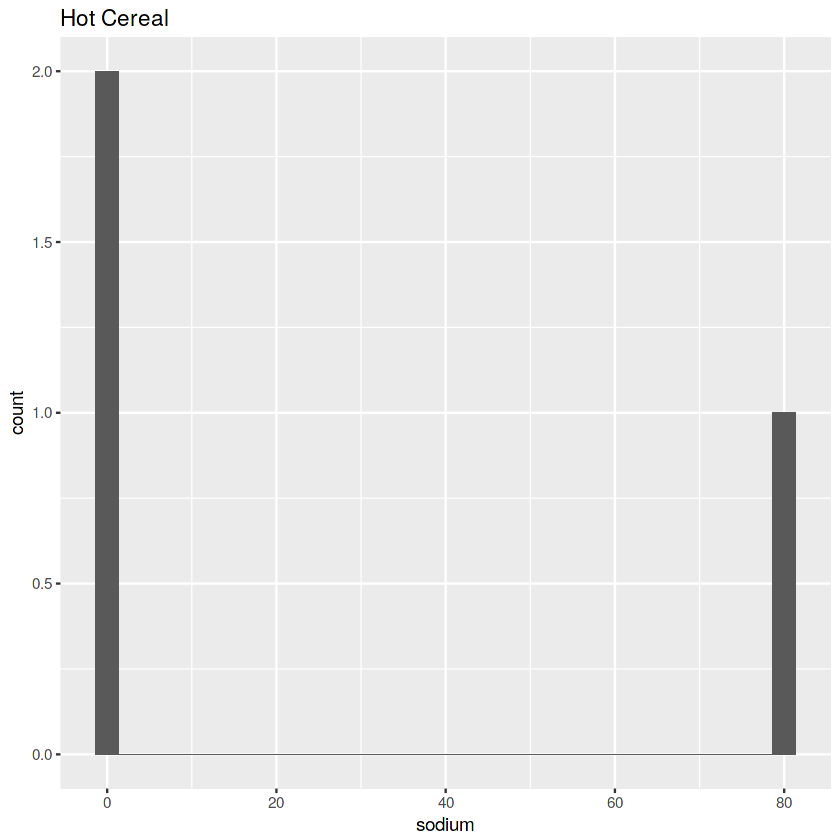

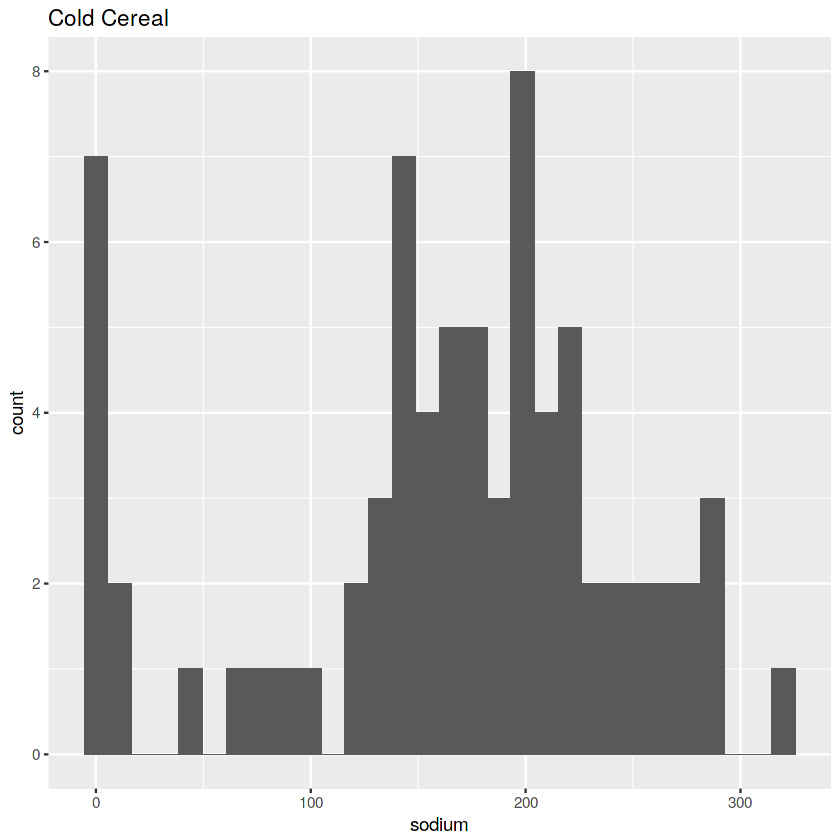

In [5]:
# plot hot and cold cereals as histograms
hotCereal %>%
    ggplot(aes(sodium)) +
    geom_histogram() +
    ggtitle("Hot Cereal")

coldCereal %>%
    ggplot(aes(sodium)) +
    geom_histogram() +
    ggtitle("Cold Cereal")